Safety Net
---
This is the culmination of Group 3's work for Project 1: Crime Analysis of San Francisco from 2018 to 2023


In [2]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.patches import Polygon
import requests
import numpy as np
import json
import requests


In [3]:
sf_orig_clean = Path("SF_Crime_Data_from_2018_to_Present_CLEANED.csv")
sf_orig_df = pd.read_csv(sf_orig_clean)
sf_orig_df.tail()


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
731420,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Monday,9/29/20 12:29,9.653111e+10,965311,200586298,202731493.0,...,Northern,Western Addition,2.0,37.788280,-122.423594,POINT (-122.42359407328958 37.78827973195545),0.0,0.0,6.0,4.0
731421,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Monday,7/14/20 13:57,9.436317e+10,943631,200421296,201961703.0,...,Tenderloin,Tenderloin,6.0,37.778719,-122.414741,POINT (-122.4147412230519 37.77871942789032),1.0,1.0,10.0,5.0
731422,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Monday,11/20/20 14:21,9.803191e+10,980319,200701703,203251939.0,...,Northern,Marina,2.0,37.803727,-122.428400,POINT (-122.42840027589088 37.80372712877811),0.0,0.0,6.0,4.0
731423,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Monday,5/28/21 12:57,1.030000e+11,1034762,210329436,211481637.0,...,Taraval,Oceanview/Merced/Ingleside,11.0,37.721659,-122.467615,POINT (-122.46761532399763 37.72165880704187),0.0,0.0,1.0,10.0
731424,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Monday,8/10/21 13:10,1.060000e+11,1058884,210508088,212221621.0,...,Tenderloin,Tenderloin,5.0,37.783933,-122.412595,POINT (-122.41259527758581 37.7839325760642),1.0,0.0,10.0,5.0


### San Francisco, according to "Police Department Incident Reports: 2018 to Present" dataset, has 41 neighborhoods ###

In [4]:
#count total number of neighborhoods:
number_of_hoods = sf_orig_df['Analysis Neighborhood'].nunique()
print(f"San Francisco, according to \"Police Department Incident Reports: 2018 to Present\" dataset, has {number_of_hoods} neighborhoods ")

San Francisco, according to "Police Department Incident Reports: 2018 to Present" dataset, has 41 neighborhoods 


### The dataframe, **sf_by_neighborhood_ct**, consist of stats grouped by **'Analysis Neighborhood'** ###

In [5]:
#group by 1 variable
#counting total number of incidents by neighborhood
sf_by_neighborhood_ct=pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
sf_by_neighborhood_ct


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Resolution,Police District,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
Analysis Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bayview Hunters Point,48870,48870,48870,48870,48870,48870,48870,48870,48870,48870,...,48870,48870,48870,48870,48870,48870,48870,48870,48870,48870
Bernal Heights,13951,13951,13951,13951,13951,13951,13951,13951,13951,13951,...,13951,13951,13951,13951,13951,13951,13951,13951,13951,13951
Castro/Upper Market,21392,21392,21392,21392,21392,21392,21392,21392,21392,21392,...,21392,21392,21392,21392,21392,21392,21392,21392,21392,21392
Chinatown,12657,12657,12657,12657,12657,12657,12657,12657,12657,12657,...,12657,12657,12657,12657,12657,12657,12657,12657,12657,12657
Excelsior,12676,12676,12676,12676,12676,12676,12676,12676,12676,12676,...,12676,12676,12676,12676,12676,12676,12676,12676,12676,12676
Financial District/South Beach,58925,58925,58925,58925,58925,58925,58925,58925,58925,58925,...,58925,58925,58925,58925,58925,58925,58925,58925,58925,58925
Glen Park,4199,4199,4199,4199,4199,4199,4199,4199,4199,4199,...,4199,4199,4199,4199,4199,4199,4199,4199,4199,4199
Golden Gate Park,7797,7797,7797,7797,7797,7797,7797,7797,7797,7797,...,7797,7797,7797,7797,7797,7797,7797,7797,7797,7797
Haight Ashbury,12246,12246,12246,12246,12246,12246,12246,12246,12246,12246,...,12246,12246,12246,12246,12246,12246,12246,12246,12246,12246


In [6]:
#grouping total number of incidents per year
#sort by total number of crime (ascending so that areas with least crime or safest neighborhoods are on top)
sf_by_year_ct= pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
df_sort=sf_by_year_ct.sort_values('Incident Datetime',ascending = True)[['Incident Datetime','Incident Year']][:15]
df_sort

,Incident Datetime,Incident Year
Analysis Neighborhood,,
McLaren Park,938,938
Seacliff,1046,1046
Presidio,1048,1048
Lincoln Park,1238,1238
Treasure Island,2659,2659
Twin Peaks,3814,3814
Glen Park,4199,4199
Presidio Heights,4824,4824
Japantown,7739,7739


In [7]:
#group by 2variables
#counting total number of incidents by neighborhood, by year
sf_neigh_yr = pd.DataFrame(sf_orig_df.groupby(['Analysis Neighborhood','Incident Year']).count())
new= sf_orig_df.sort_values(by = ['Analysis Neighborhood','Incident Year'])
df_index=sf_neigh_yr.reset_index()
df=df_index.set_index('Incident Year')
df

,Analysis Neighborhood,Incident Datetime,Incident Date,Incident Time,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Resolution,Police District,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
Incident Year,,,,,,,,,,,,,,,,,,,,,
2018,Bayview Hunters Point,7922,7922,7922,7922,7922,7922,7922,7922,7922,...,7922,7922,7922,7922,7922,7922,7922,7922,7922,7922
2019,Bayview Hunters Point,8076,8076,8076,8076,8076,8076,8076,8076,8076,...,8076,8076,8076,8076,8076,8076,8076,8076,8076,8076
2020,Bayview Hunters Point,7874,7874,7874,7874,7874,7874,7874,7874,7874,...,7874,7874,7874,7874,7874,7874,7874,7874,7874,7874
2021,Bayview Hunters Point,8982,8982,8982,8982,8982,8982,8982,8982,8982,...,8982,8982,8982,8982,8982,8982,8982,8982,8982,8982
2022,Bayview Hunters Point,8903,8903,8903,8903,8903,8903,8903,8903,8903,...,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Western Addition,4706,4706,4706,4706,4706,4706,4706,4706,4706,...,4706,4706,4706,4706,4706,4706,4706,4706,4706,4706
2020,Western Addition,3663,3663,3663,3663,3663,3663,3663,3663,3663,...,3663,3663,3663,3663,3663,3663,3663,3663,3663,3663
2021,Western Addition,3537,3537,3537,3537,3537,3537,3537,3537,3537,...,3537,3537,3537,3537,3537,3537,3537,3537,3537,3537


In [8]:
#grouping total number of incidents per year per neighborhood
sf_by_year_ct= pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
sf_by_year_ct.sort_values('Incident Datetime',ascending = False)
sf_by_year_ct

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Resolution,Police District,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
Analysis Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bayview Hunters Point,48870,48870,48870,48870,48870,48870,48870,48870,48870,48870,...,48870,48870,48870,48870,48870,48870,48870,48870,48870,48870
Bernal Heights,13951,13951,13951,13951,13951,13951,13951,13951,13951,13951,...,13951,13951,13951,13951,13951,13951,13951,13951,13951,13951
Castro/Upper Market,21392,21392,21392,21392,21392,21392,21392,21392,21392,21392,...,21392,21392,21392,21392,21392,21392,21392,21392,21392,21392
Chinatown,12657,12657,12657,12657,12657,12657,12657,12657,12657,12657,...,12657,12657,12657,12657,12657,12657,12657,12657,12657,12657
Excelsior,12676,12676,12676,12676,12676,12676,12676,12676,12676,12676,...,12676,12676,12676,12676,12676,12676,12676,12676,12676,12676
Financial District/South Beach,58925,58925,58925,58925,58925,58925,58925,58925,58925,58925,...,58925,58925,58925,58925,58925,58925,58925,58925,58925,58925
Glen Park,4199,4199,4199,4199,4199,4199,4199,4199,4199,4199,...,4199,4199,4199,4199,4199,4199,4199,4199,4199,4199
Golden Gate Park,7797,7797,7797,7797,7797,7797,7797,7797,7797,7797,...,7797,7797,7797,7797,7797,7797,7797,7797,7797,7797
Haight Ashbury,12246,12246,12246,12246,12246,12246,12246,12246,12246,12246,...,12246,12246,12246,12246,12246,12246,12246,12246,12246,12246


In [9]:
df_sort.index

Index(['McLaren Park', 'Seacliff', 'Presidio', 'Lincoln Park',
       'Treasure Island', 'Twin Peaks', 'Glen Park', 'Presidio Heights',
       'Japantown', 'Golden Gate Park', 'Oceanview/Merced/Ingleside',
       'Visitacion Valley', 'Noe Valley', 'Portola', 'Lone Mountain/USF'],
      dtype='object', name='Analysis Neighborhood')

The top five safest neighborhoods (with lowest crime incident count) are:['McLaren Park', 'Seacliff', 'Presidio', 'Lincoln Park', 'Treasure Island']


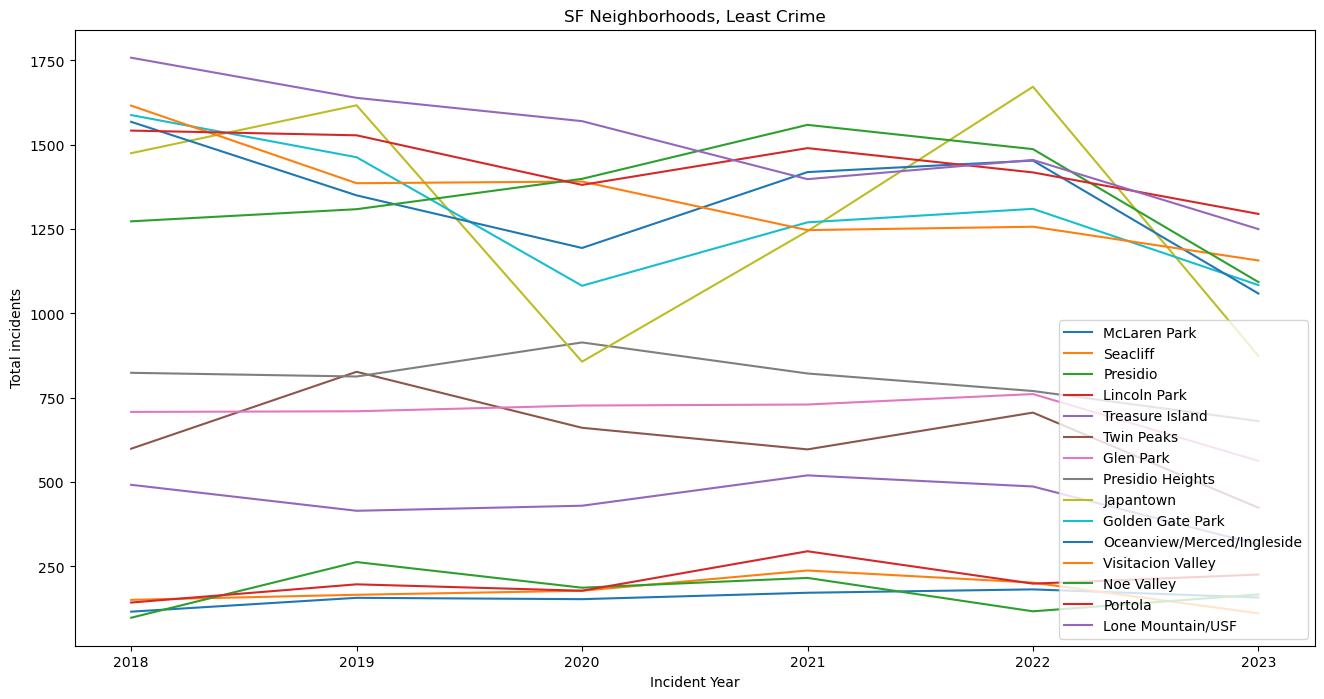

In [15]:
#plot top 15 neighborhoods, print top 5 
count =0
top_five=[]
for neigh in df_sort.index:
    
    df[df['Analysis Neighborhood']==neigh].Latitude.plot(figsize=[16,8], 
        title='SF Neighborhoods, Least Crime')
    plt.ylabel('Total incidents')
    plt.legend(df_sort.index,loc='lower right')
    if neigh <= neigh:
        count=count+1
        if count <= 5: 
            top_five.append(neigh)
print(f'The top five safest neighborhoods (with lowest crime incident count) are:{top_five}')

In [16]:
#Grouping total number of incidents per year per neighborhood.
#Sort by descending number of crimes (any column can be used as the count function will account for all cells with values)
sf_by_year_ct_most= pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
df_sort_most=sf_by_year_ct_most.sort_values('Incident Datetime',ascending = False)[['Incident Datetime','Incident Year']][:15]
df_sort_most

,Incident Datetime,Incident Year
Analysis Neighborhood,,
Mission,78169,78169
Tenderloin,75445,75445
South of Market,59888,59888
Financial District/South Beach,58925,58925
Bayview Hunters Point,48870,48870
North Beach,25036,25036
Western Addition,23871,23871
Sunset/Parkside,21876,21876
Castro/Upper Market,21392,21392


The five least safe  neighborhoods (with highest crime incident count) are:['McLaren Park', 'Seacliff', 'Presidio', 'Lincoln Park', 'Treasure Island']


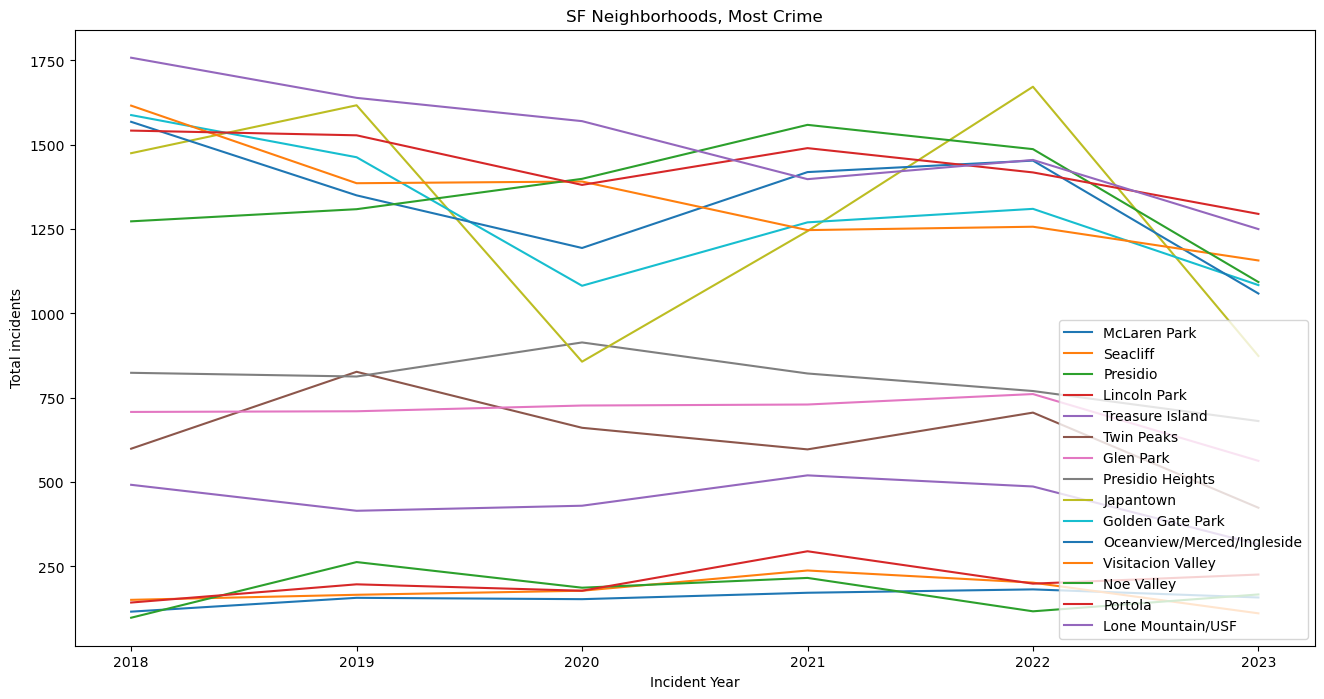

In [17]:
#plot bottom 15 neighborhoods (least safe), print first 5 in the list
count =0
bottom_five=[]
for neigh in df_sort.index:
    
    df[df['Analysis Neighborhood']==neigh].Latitude.plot(figsize=[16,8], 
        title='SF Neighborhoods, Most Crime')
    plt.ylabel('Total incidents')
    plt.legend(df_sort.index,loc='lower right')
    if neigh <= neigh:
        count=count+1
        if count <= 5: 
            bottom_five.append(neigh)
print(f'The five least safe  neighborhoods (with highest crime incident count) are:{bottom_five}')

In [237]:
# # SafeNet Crime Data Analysis (San Francisco)
# -Crime Trends Over Time - create series plots or histograms to visualize trends, seasonal patterns
# -Crime by Geographic Location - explore how crimes are distributed across different polic areas
# -Crime Types and Severity - 
# -Demographic Analysis
# -Time of Day Analysis
# -Weapon Usage
# -Crime Clearance Rates
# -Crime Correlations - types of crime (ex: crm code)
# -Create spatial analysis (Hotspot Analysis)
# -Crime Trends During Special Events
# -Comparative Analysis with SF Crime Data

In [19]:
crimedata_headers = sf_orig_df.columns.tolist()
crimedata_headers

['Incident Datetime',
 'Incident Date',
 'Incident Time',
 'Incident Year',
 'Incident Day of Week',
 'Report Datetime',
 'Row ID',
 'Incident ID',
 'Incident Number',
 'CAD Number',
 'Report Type Code',
 'Report Type Description',
 'Incident Code',
 'Incident Category',
 'Incident Subcategory',
 'Incident Description',
 'Resolution',
 'Police District',
 'Analysis Neighborhood',
 'Supervisor District',
 'Latitude',
 'Longitude',
 'Point',
 'Civic Center Harm Reduction Project Boundary',
 'HSOC Zones as of 2018-06-05',
 'Current Supervisor Districts',
 'Current Police Districts']

In [20]:
unique_crime_codes = unique_crime_codes = sf_orig_df["Incident Code"].unique()
unique_crime_description = sf_orig_df["Incident Description"].unique()

#Create a list of tuples, each will contain crime code and its description
unique_crime_tp = [(code, desc) for code, desc in zip(unique_crime_codes, unique_crime_description)]

#Sort the list
unique_crime_tp_sorted = sorted(unique_crime_tp, key=lambda x: x[0])

#Unpack the sorted list
unique_crime_codes_sorted, unique_crime_descrioption_sorted = zip(*unique_crime_tp_sorted)

unique_codes_sorted = pd.DataFrame({
    "Incident Code": unique_crime_codes_sorted,
    "Incident Description": unique_crime_descrioption_sorted
 
})
print(len(unique_codes_sorted))
unique_codes_sorted.head(50)["Incident Code"].unique()
unique_crime_description = sf_orig_df["Incident Description"].unique()

#Create a list of tuples, each will contain crime code and its description
unique_crime_tp = [(code, desc) for code, desc in zip(unique_crime_codes, unique_crime_description)]

#Sort the list
unique_crime_tp_sorted = sorted(unique_crime_tp, key=lambda x: x[0])

#Unpack the sorted list
unique_crime_codes_sorted, unique_crime_descrioption_sorted = zip(*unique_crime_tp_sorted)

unique_codes_sorted = pd.DataFrame({
    "Incident Code": unique_crime_codes_sorted,
    "Incident Description": unique_crime_descrioption_sorted
 
})
print(len(unique_codes_sorted))
unique_codes_sorted.head(50)

810
810


,Incident Code,Incident Description
0,1000,"Weapon, Concealed, Loitering While Carrying"
1,1001,"Theft of Telecommunication Services, incl. Clo..."
2,1002,Suicide By Asphyxiation
3,1003,Kidnapping for Ransom or Extortion
4,1004,"School, Disrupt Activities"
5,1005,"Theft, Short Change"
6,1007,"Stolen Access Card, Possession"
7,1062,"Letters, Opening Sealed"
8,1133,Terrorizing by Interfering with Religious Worship
9,1160,Post Release Community Supervision


In [21]:
#Write the sorted result to .csv file for further analysis
unique_codes_sorted.to_csv("unique_codes_sorted.csv", index=False)  #Total of 841 records

In [22]:
#Grouping the keywords in the SF Incident Desciption as Violent Crime
violent_crime_keywords = ["suicide","assault","rape", "homicide", "shooting", "incest", "kidnapping", "death",\
                          "sexual assault", "manslaughter", "sodomy","sex","sexual"]

mask_violent_description = unique_codes_sorted["Incident Description"].str.contains("|".join(violent_crime_keywords), case=False)
violent_crime_group = unique_codes_sorted[mask_violent_description]

#Collect the corresponding "SF Incident Code" and save to a variable
violent_crime_codes = violent_crime_group["Incident Code"].tolist()

#Display the results:
print(f"Total number of Violent Crime type: {len(violent_crime_codes)} of 840")
print("List of Violent Crime by Incident Code")
print(f"Incident Code: {violent_crime_codes}")


Total number of Violent Crime type: 92 of 840
List of Violent Crime by Incident Code
Incident Code: [1002, 1003, 2103, 3023, 3044, 3061, 3063, 3432, 3443, 3463, 3492, 4011, 4012, 4013, 4022, 4024, 4081, 4093, 4145, 4146, 5012, 5021, 5061, 5131, 5163, 5361, 6124, 6126, 6130, 6131, 6132, 6231, 6232, 6341, 6360, 6396, 7020, 7051, 7200, 7204, 9010, 9023, 9162, 9163, 9210, 9264, 10085, 10120, 10149, 12090, 12160, 12171, 13045, 14030, 15097, 15152, 15200, 15302, 15303, 16040, 16410, 16430, 16510, 16520, 16642, 16712, 17030, 19088, 19100, 26036, 26037, 26105, 26170, 26175, 26180, 26200, 26211, 27020, 27066, 27072, 27122, 27173, 28120, 28130, 30009, 30150, 60020, 60070, 61030, 62072, 64030, 73000]


In [23]:
#Grouping the keywords in the Incident Description
property_crime_keywords = ["robbery", "burglary","theft","larceny", \
                           "access card","carjacking", "extortion","contraband","arson","fire","auto",\
                           "vehicle","lost","vandalism","carjacking","destruction"]
mask_property_description = unique_codes_sorted["Incident Description"].str.contains("|".join(property_crime_keywords), case=False)
property_crime_group = unique_codes_sorted[mask_property_description]

#Collect the corresponding "Incident Code" and save to a variable
property_crime_codes = property_crime_group["Incident Code"].tolist()

#Display the results:
print(f"Total number of Property Crime type: {len(property_crime_codes)}")
print("List of Property Crime by Incident Code")
print(f"Incident Code: {property_crime_codes}")


Total number of Property Crime type: 332
List of Property Crime by Incident Code
Incident Code: [1001, 1003, 1005, 1007, 2002, 2004, 2020, 2101, 2201, 3011, 3013, 3023, 3024, 3033, 3041, 3042, 3043, 3051, 3054, 3064, 3071, 3073, 3074, 3081, 3082, 3083, 3084, 3091, 3092, 3411, 3423, 3442, 3451, 3452, 3461, 3464, 3471, 3483, 3484, 4014, 4021, 4023, 4024, 4026, 4051, 4052, 4063, 4073, 4074, 4080, 4082, 4083, 4092, 4114, 4124, 5013, 5014, 5022, 5023, 5031, 5033, 5041, 5043, 5051, 5052, 5053, 5063, 5072, 5073, 5081, 5082, 5112, 5113, 5121, 5131, 5133, 5141, 5151, 5152, 5153, 5173, 5231, 5251, 5261, 5271, 5371, 6111, 6114, 6122, 6123, 6141, 6142, 6150, 6212, 6213, 6214, 6221, 6223, 6224, 6230, 6233, 6234, 6240, 6242, 6246, 6300, 6301, 6302, 6303, 6304, 6310, 6314, 6315, 6316, 6340, 6343, 6362, 6363, 6364, 6365, 6371, 6372, 6373, 6374, 6395, 6398, 6400, 7021, 7024, 7027, 7041, 7043, 7044, 7046, 7052, 7055, 7056, 7100, 7202, 7203, 7206, 9030, 9031, 9060, 9150, 9161, 9165, 9175, 9176, 9215, 926

In [24]:
#Grouping the keywords in the SF Incident Desciption as White Collar Crime
white_collar_crime = ["fraud","embezzlement","personation", "impersonation","counterfeit","imperson","counterfeiting",\
                      "falsify","false","permit","forgery", "cryptocurrency","fraudulent"]
mask_white_collar = unique_codes_sorted["Incident Description"].str.contains("|".join(white_collar_crime), case=False)
white_collar_group = unique_codes_sorted[mask_white_collar]
#Collect the corresponding "SF Incident Code" and save to a variable
white_collar_codes = white_collar_group["Incident Code"].tolist()
#Display the results:
print(f"Total number of White collar crime type: {len(white_collar_codes)} of 840")
print("List of White collar crime by Incident Code")
print(f"Incident Code: {white_collar_codes}")

Total number of White collar crime type: 73 of 840
List of White collar crime by Incident Code
Incident Code: [2002, 2202, 3012, 3062, 3444, 3454, 4072, 5062, 6125, 6141, 6213, 6214, 6222, 6224, 6243, 6312, 6391, 6400, 7203, 9015, 9016, 9021, 9026, 9027, 9031, 9034, 9130, 9165, 9176, 9250, 9263, 9267, 9268, 9270, 10040, 10060, 12040, 14043, 14060, 15151, 15160, 16030, 16100, 16656, 16705, 16780, 17070, 19081, 26039, 26149, 27040, 27080, 27140, 27155, 27165, 27196, 27197, 27198, 27199, 27201, 28040, 28136, 28169, 28181, 30011, 30160, 60050, 60080, 60170, 64090, 65040, 65080, 68030]


In [25]:
#Grouping the keywords in the SF Incident Desciption as Drug and Alcohol Crime
drug_alcohol_crime = ["drug","alcohol","opiates","opium", "methamphetamine","needle","barb","ingest","narcotic",\
                      "marijuana","cocaine","substance","hallucinogenic","hallucinogenics", "aerosol","heroin","methadone",\
                      "amphetamine","driving","barbiturates","controlled substance"]
mask_drug_alcohol = unique_codes_sorted["Incident Description"].str.contains("|".join(drug_alcohol_crime), case=False)
drug_alcohol_group = unique_codes_sorted[mask_drug_alcohol]
#Collect the corresponding "SF Incident Code" and save to a variable
drug_alcohol_codes = drug_alcohol_group["Incident Code"].tolist()
#Display the results:
print(f"Total number of Drug & Alcohol crime type: {len(drug_alcohol_codes)} of 840")
print("List of Drug & Alcohol crime by Incident Code")
print(f"Incident Code: {drug_alcohol_codes}")

Total number of Drug & Alcohol crime type: 90 of 840
List of Drug & Alcohol crime by Incident Code
Incident Code: [2001, 2102, 2204, 3021, 3031, 3032, 3034, 3094, 3401, 3433, 3474, 3494, 4064, 4154, 4170, 5011, 5111, 5142, 5171, 6110, 6111, 6131, 6143, 6211, 6313, 6370, 7026, 7054, 7200, 7205, 9060, 9164, 9266, 10055, 10070, 11016, 12055, 13020, 13115, 14072, 15095, 15150, 15154, 16010, 16050, 16060, 16220, 16420, 16610, 16620, 16621, 16622, 16623, 16632, 16645, 16652, 16654, 16662, 16664, 16700, 16710, 16730, 17130, 19084, 26020, 26140, 26150, 26177, 27067, 27172, 27220, 27300, 28010, 28050, 28060, 28103, 28120, 28168, 30110, 30191, 60120, 61020, 61040, 64001, 64017, 65016, 66040, 73001, 74000, 75030]


In [26]:
#Grouping the keywords in the SF Incident Desciption as  Hate crimes
hate_crime = ["threat","hate","swear", "peace", "riot","conspiracy","place of worship"]
mask_hate_crime = unique_codes_sorted["Incident Description"].str.contains("|".join(hate_crime), case=False)
hate_crime_group = unique_codes_sorted[mask_hate_crime]
#Collect the corresponding "SF Incident Code" and save to a variable
hate_crime_codes = hate_crime_group["Incident Code"].tolist()
#Display the results:
print(f"Total number of Hate crime type: {len(hate_crime_codes)} of 840")
print("List of Hate crime by Incident Code")
print(f"Incident Code: {hate_crime_codes}")

Total number of Hate crime type: 25 of 840
List of Hate crime by Incident Code
Incident Code: [3053, 3093, 3414, 3421, 3434, 4061, 4091, 4136, 6133, 6151, 6222, 6381, 9035, 10035, 12163, 16230, 16640, 19010, 19057, 26039, 27066, 27071, 28092, 60030, 65070]


In [27]:
#Grouping the keywords in the SF Incident Desciption as  Quality of life disruptions
quality_life_disrupt = ["biting","disrupt","swear", "graffiti", "trespass","vandal","mischief","animal","loit",\
                        "unusual","against","disorderly","traffic","warrant","weapon","malicious",\
                        "suspicious","non-criminal","missing","collision","investigation",\
                        "mental","harassing","detention","battery","conspiracy","eavesdropping", "prostitution",\
                        "interfering","fireworks","pimping","evading a police","disturbing","traffic","racing",\
                        "knife", "permit","violation","riot","bathroom hole","resisting",\
                        "infractions","permit violation","throwing injurious substance","disturbance"]
mask_quality_life = unique_codes_sorted["Incident Description"].str.contains("|".join(quality_life_disrupt), case=False)
quality_life_group = unique_codes_sorted[mask_quality_life]
#Collect the corresponding "SF Incident Code" and save to a variable
quality_life_codes = quality_life_group["Incident Code"].tolist()
#Display the results:
print(f"Total number of Quality of life disruptions: {len(quality_life_codes)} of 840")
print("List of Quality of life disruptions by Incident Code")
print(f"Incident Code: {quality_life_codes}")

Total number of Quality of life disruptions: 202 of 840
List of Quality of life disruptions by Incident Code
Incident Code: [1000, 1004, 1133, 2003, 2204, 3022, 3041, 3044, 3061, 3062, 3072, 3084, 3411, 3413, 3421, 3441, 3443, 3451, 3454, 3461, 3472, 3481, 3483, 3493, 4012, 4013, 4026, 4033, 4054, 4062, 4063, 4081, 4091, 4104, 4134, 4144, 4145, 5012, 5015, 5022, 5042, 5071, 5122, 5123, 5172, 5231, 5241, 6112, 6113, 6130, 6133, 6151, 6152, 6153, 6157, 6220, 6300, 6304, 6310, 6314, 6341, 6343, 6361, 6370, 6386, 6394, 7022, 7023, 7025, 7046, 7051, 7202, 9010, 9029, 9150, 9163, 9164, 9166, 9265, 9269, 9320, 9330, 10025, 10035, 10050, 10060, 10065, 10085, 10110, 11013, 11015, 11017, 12015, 12026, 12030, 12140, 12160, 12161, 12163, 12165, 12172, 13010, 13060, 14020, 14031, 14043, 15152, 15154, 15161, 15163, 15301, 16010, 16020, 16230, 16240, 16430, 16540, 16612, 16626, 16629, 16630, 16640, 16650, 16704, 17072, 19015, 19022, 19024, 19025, 19032, 19055, 19058, 19072, 19080, 19083, 19089, 19400

In [28]:
# # Revise Incident Code Assignment as follows:
# 101 - Violent Crime
# 102 - Property Crime
# 103 - White Collar Crime
# 104 - Drug & Alcohol Crime
# 105 - Hate Crime
# 106 - Quality-of-life Crime

In [36]:

import numpy as np


# Initialize "New Incident ID" with original values
sf_orig_df["New Incident Code"] = sf_orig_df['Incident Code']

# Assign 101 to Violent Crime codes and add "New Incident ID" column
mask_violent = sf_orig_df['Incident Code'].isin(violent_crime_codes)
sf_orig_df.loc[mask_violent, "New Incident Code"] = 101  # This will locate all Incident Codes under violent crime codes list and assign them as 101 in the new column called "New Incident ID"

# Assign 102 to Property Crime codes 
mask_property = sf_orig_df['Incident Code'].isin(property_crime_codes)
sf_orig_df.loc[mask_property & ~mask_violent, "New Incident Code"] = 102  # Exclude already labeled as violent crime codes

# Assign 103 to White Collar Crime codes
mask_white_collar = sf_orig_df['Incident Code'].isin(white_collar_codes)
sf_orig_df.loc[mask_white_collar & ~mask_violent & ~mask_property, "New Incident Code"] = 103    #Exclude already labeled as violent crime or property crime codes

# Assign 104 to Drug & Alcohol Crime codes
mask_drug_alcohol = sf_orig_df['Incident Code'].isin(drug_alcohol_codes)
sf_orig_df.loc[mask_drug_alcohol & ~mask_violent & ~mask_property & ~mask_white_collar, "New Incident Code"] = 104   #Exclude already labeled as violent crime, property crime & white collar crime codes

# Assign 105 to Hate Crime codes
mask_hate = sf_orig_df['Incident Code'].isin(hate_crime_codes)
sf_orig_df.loc[mask_hate & ~mask_violent & ~mask_property & ~mask_white_collar & ~mask_drug_alcohol, "New Incident Code"] = 105   #Exclude already labeled as violent crime, property crime, white collar crime & drug & alcohol crime codes

# # Assign 106 to Quality of life Crime codes
mask_quality_life = sf_orig_df['Incident Code'].isin(quality_life_codes)
sf_orig_df.loc[mask_quality_life & ~mask_violent & ~mask_property & ~mask_white_collar & ~mask_drug_alcohol & ~mask_hate, "New Incident Code"] = 106   #Exclude already labeled as violent crime, property crime, white collar crime, drug & alcohol crime and hate crime codes


display(sf_orig_df.head(50))

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts,New Incident Code
0,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Friday,10/13/23 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),0.0,0.0,9.0,2.0,106
1,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Friday,10/13/23 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),0.0,0.0,9.0,2.0,102
2,10/13/23 20:40,10/13/23,8:40:00 PM,2023,Friday,10/13/23 20:49,1.330000e+11,1328218,230736946,232863345.0,...,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0,102
3,10/13/23 20:40,10/13/23,8:40:00 PM,2023,Friday,10/13/23 20:49,1.330000e+11,1328218,230736946,232863345.0,...,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0,106
4,10/13/23 20:37,10/13/23,8:37:00 PM,2023,Friday,10/13/23 20:49,1.330000e+11,1328221,230736924,232863318.0,...,Bayview Hunters Point,10.0,37.729543,-122.386419,POINT (-122.38641847685011 37.72954271057539),0.0,0.0,9.0,2.0,106
5,10/13/23 20:25,10/13/23,8:25:00 PM,2023,Friday,10/13/23 20:39,1.330000e+11,1328212,230736899,232863317.0,...,Financial District/South Beach,3.0,37.787568,-122.406590,POINT (-122.40658988465438 37.7875680237141),0.0,0.0,3.0,6.0,101
6,10/13/23 20:07,10/13/23,8:07:00 PM,2023,Friday,10/13/23 20:28,1.330000e+11,1328210,230736861,232863241.0,...,Bayview Hunters Point,10.0,37.727425,-122.382687,POINT (-122.38268699042688 37.727424871385494),0.0,0.0,9.0,2.0,106
7,10/13/23 20:00,10/13/23,8:00:00 PM,2023,Friday,10/13/23 20:07,1.330000e+11,1328217,230736827,232863225.0,...,Tenderloin,3.0,37.786101,-122.418088,POINT (-122.41808809883916 37.78610103879033),0.0,0.0,10.0,6.0,106
8,10/13/23 19:50,10/13/23,7:50:00 PM,2023,Friday,10/13/23 20:33,1.330000e+11,1328220,230736918,232863255.0,...,Outer Richmond,1.0,37.775226,-122.508024,POINT (-122.5080243933501 37.77522567974258),0.0,0.0,4.0,8.0,106
9,10/13/23 19:42,10/13/23,7:42:00 PM,2023,Friday,10/13/23 19:42,1.330000e+11,1328184,230736720,232863163.0,...,South of Market,6.0,37.776231,-122.414711,POINT (-122.41471100473302 37.77623051953945),1.0,1.0,10.0,1.0,104


In [37]:
sf_orig_new= sf_orig_df[['New Incident Code','Incident Datetime','Incident Date','Incident Time','Incident Year','Analysis Neighborhood']]
sf_orig_new

,New Incident Code,Incident Datetime,Incident Date,Incident Time,Incident Year,Analysis Neighborhood
0,106,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Bayview Hunters Point
1,102,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Bayview Hunters Point
2,102,10/13/23 20:40,10/13/23,8:40:00 PM,2023,South of Market
3,106,10/13/23 20:40,10/13/23,8:40:00 PM,2023,South of Market
4,106,10/13/23 20:37,10/13/23,8:37:00 PM,2023,Bayview Hunters Point
...,...,...,...,...,...,...
731420,106,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Western Addition
731421,68020,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Tenderloin
731422,102,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Marina
731423,106,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Oceanview/Merced/Ingleside


In [38]:
newcode_clean= sf_orig_new.loc[(sf_orig_new['New Incident Code']<=106)]
newcode_clean

,New Incident Code,Incident Datetime,Incident Date,Incident Time,Incident Year,Analysis Neighborhood
0,106,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Bayview Hunters Point
1,102,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Bayview Hunters Point
2,102,10/13/23 20:40,10/13/23,8:40:00 PM,2023,South of Market
3,106,10/13/23 20:40,10/13/23,8:40:00 PM,2023,South of Market
4,106,10/13/23 20:37,10/13/23,8:37:00 PM,2023,Bayview Hunters Point
...,...,...,...,...,...,...
731418,103,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Portola
731420,106,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Western Addition
731422,102,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Marina
731423,106,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Oceanview/Merced/Ingleside


In [35]:
newcode_clean.reset_index()
newcode_clean.head(50)

,New Incident Code,Incident Datetime,Incident Date,Incident Time,Incident Year,Analysis Neighborhood
0,106,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Bayview Hunters Point
1,102,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Bayview Hunters Point
2,102,10/13/23 20:40,10/13/23,8:40:00 PM,2023,South of Market
3,106,10/13/23 20:40,10/13/23,8:40:00 PM,2023,South of Market
4,106,10/13/23 20:37,10/13/23,8:37:00 PM,2023,Bayview Hunters Point
5,101,10/13/23 20:25,10/13/23,8:25:00 PM,2023,Financial District/South Beach
6,106,10/13/23 20:07,10/13/23,8:07:00 PM,2023,Bayview Hunters Point
7,106,10/13/23 20:00,10/13/23,8:00:00 PM,2023,Tenderloin
8,106,10/13/23 19:50,10/13/23,7:50:00 PM,2023,Outer Richmond
9,104,10/13/23 19:42,10/13/23,7:42:00 PM,2023,South of Market


In [39]:
#group by Neighborhood, year, incident type
#count number of incidents per type
newcode_clean_org = pd.DataFrame(newcode_clean.groupby(['Analysis Neighborhood','Incident Year','New Incident Code']).count())
newcode_clean_org= newcode_clean_org.sort_values(by = ['Analysis Neighborhood','Incident Year'])
newcode_clean_org.head(50)

newcode_clean_org.reset_index()

,Analysis Neighborhood,Incident Year,New Incident Code,Incident Datetime,Incident Date,Incident Time
0,Bayview Hunters Point,2018,101,550,550,550
1,Bayview Hunters Point,2018,102,3605,3605,3605
2,Bayview Hunters Point,2018,103,187,187,187
3,Bayview Hunters Point,2018,104,387,387,387
4,Bayview Hunters Point,2018,105,180,180,180
...,...,...,...,...,...,...
1453,Western Addition,2023,102,1456,1456,1456
1454,Western Addition,2023,103,90,90,90
1455,Western Addition,2023,104,185,185,185
1456,Western Addition,2023,105,56,56,56


In [40]:
#Export results to .csv file for pivot table and line graph analysis
#Manipulated excel files (2) uploaded in Team repository - analyzed both top and bottom neighborhoods based on categorized crimes
newcode_clean_org.to_csv("newcode_clean_org.csv", index=False)  #Total of 841 records

## Roland Abellano's analysis of McLaren Neighborhood starts here ##

### Micro analysis of McLaren Park/Amazon-Crocker Neighborhood: the "safest" neighborhood in San Francisco ###

Based on the article, "The 15 Safest Neighborhoods In San Francisco", by Jessica Stone in the website, Upgraded Homes, Crocker-Amazon was one of the 15 safest neighborhood on San Francisco. As a local San Franciscan living only a mile east of Crocker-Amazon neighborhood, I have a personal stake at the accuracy of what Ms. Stone's article is claiming. I would like to find out if District 10, where Amazon-Crocker and my local neighborhood, Bayview, have significant crime rate rating difference in comparison to the rest of San Francisco.

Website link: https://upgradedhome.com/safest-neighborhoods-in-san-francisco/

**Null Hypothesis: Crocker Amazon is considered the safest neighborhood in the city.**

### Caveat ###

Based on the dataset from DataSF (https://data.sfgov.org), **Crocker-Amazon**, is not present in the list of 40 unique neighborhood gathered in the dataset. However, the neighborhood of **McLaren Park** is in the same area of the historically known neighborhood of Crocker Amazon. For the sake of this analysis, we will use McLaren Park stats as a stand in for Crocker-Amazon.

In [ ]:
# sf_orig_clean = Path("SF_Crime_Data_from_2018_to_Present.csv")
# sf_orig_df = pd.read_csv(sf_orig_clean)
# sf_orig_df

In [4]:
crimedata_headers = sf_orig_df.columns.tolist()
crimedata_headers

['Incident Datetime',
 'Incident Date',
 'Incident Time',
 'Incident Year',
 'Incident Day of Week',
 'Report Datetime',
 'Row ID',
 'Incident ID',
 'Incident Number',
 'CAD Number',
 'Report Type Code',
 'Report Type Description',
 'Incident Code',
 'Incident Category',
 'Incident Subcategory',
 'Incident Description',
 'Resolution',
 'Intersection',
 'Police District',
 'Analysis Neighborhood',
 'Supervisor District',
 'Latitude',
 'Longitude',
 'Point',
 'Civic Center Harm Reduction Project Boundary',
 'HSOC Zones as of 2018-06-05',
 'Current Supervisor Districts',
 'Current Police Districts']

In [5]:
# Extract the unique values from the 'Analysis Neighborhood' column
unique_neighborhoods = sf_orig_df['Analysis Neighborhood'].unique()

# Create a new DataFrame with the unique neighborhoods
unique_neighborhoods_df = pd.DataFrame(unique_neighborhoods, columns=['Unique Neighborhoods'])

unique_neighborhoods_df

,Unique Neighborhoods
0,Bayview Hunters Point
1,South of Market
2,Financial District/South Beach
3,Tenderloin
4,Outer Richmond
5,Outer Mission
6,Mission
7,Nob Hill
8,West of Twin Peaks
9,Castro/Upper Market


### Show the crime rate of the 40 neighborhoods in San Francisco for the Year 2020 ###

In [6]:
# Filter data for 'Incident Year' 2020
crimes_2020 = sf_orig_df[sf_orig_df['Incident Year'] == 2020]

# Group by 'Analysis Neighborhood' and count unique 'Incident ID'
neighborhood_counts = crimes_2020.groupby('Analysis Neighborhood')['Incident ID'].nunique().sort_values()

# Print or use the results as needed
print(neighborhood_counts)

# Print analysis
print(f"\nThe neighborhood with the LOWEST CRIME INCIDENT in the year 2020 is {neighborhood_counts.idxmin()}")

Analysis Neighborhood
McLaren Park                       133
Lincoln Park                       168
Seacliff                           168
Presidio                           215
Treasure Island                    353
Twin Peaks                         599
Glen Park                          648
Japantown                          771
Presidio Heights                   805
Golden Gate Park                   965
Oceanview/Merced/Ingleside        1032
Lakeshore                         1053
Visitacion Valley                 1159
Portola                           1168
Noe Valley                        1284
Inner Sunset                      1399
Lone Mountain/USF                 1401
Inner Richmond                    1407
Chinatown                         1506
Outer Mission                     1517
Mission Bay                       1691
Haight Ashbury                    1726
Excelsior                         1870
Potrero Hill                      1954
Bernal Heights                    1986
Wes

### Show a line graph indicating the number of crime incidents in McLaren Park/Crocker-Amazon for Year 2020 ###

**Spoiler Alert: Monday seems to be the day when the most crimes were committed in McLaren Park/Crocker-Amazon for the year 2020**

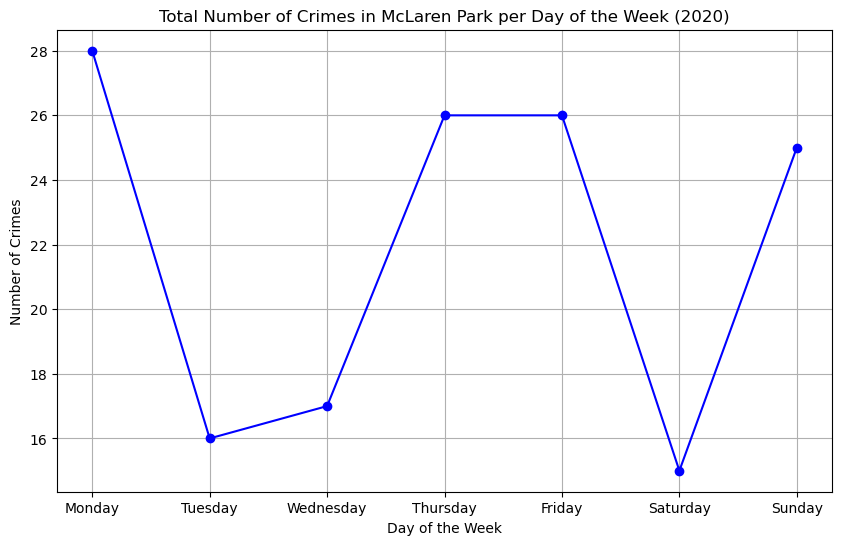

In [8]:
# Analyze data to show what day of the week is crime commited the most in McLAren Park/Cro
# Filter data for McLaren Park and the year 2020
mclaren_park_2020_data = sf_orig_df[(sf_orig_df['Analysis Neighborhood'] == 'McLaren Park') & (sf_orig_df['Incident Year'] == 2020)]

# Group data by day of the week and calculate the total number of crimes
crimes_per_day_2020 = mclaren_park_2020_data['Incident Day of Week'].value_counts().sort_index()

# Define the order of days for proper sorting in the line graph
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line graph
plt.figure(figsize=(10, 6))
crimes_per_day_2020[days_order].plot(marker='o', linestyle='-', color='b')
plt.title('Total Number of Crimes in McLaren Park per Day of the Week (2020)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

### For the sake of comparison, show the same week-long crime trend for McLaren Park/Crocker Amazon for a period of 5 years (2018-2023) ###

**Spoiler Alert: From year 2018 to year 2023, Friday seems to be the day when most crimes were committed in McLaren Park/Crocker-Amazon neighborhood**

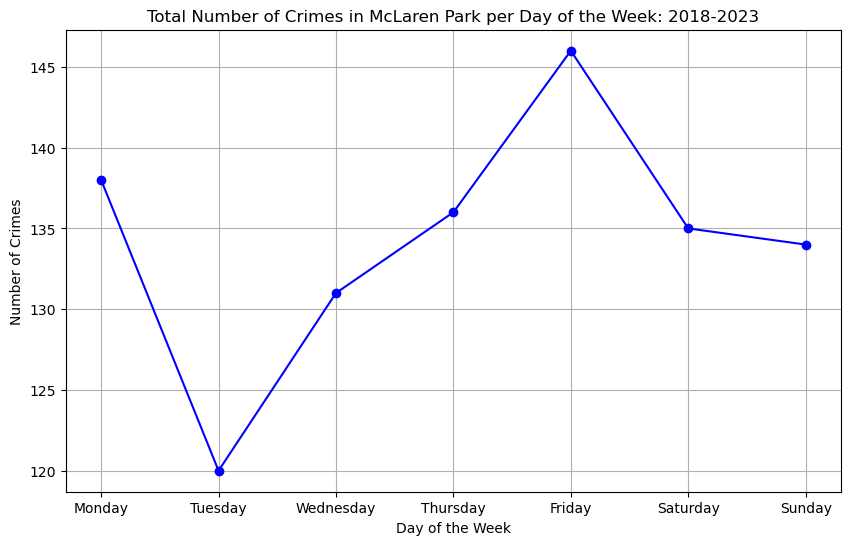

In [9]:
# Filter data for McLaren Park
mclaren_park_data_2018_2023 = sf_orig_df[sf_orig_df['Analysis Neighborhood'] == 'McLaren Park']

# Group data by day of the week and calculate the total number of crimes
crimes_per_day_2018_2023 = mclaren_park_data_2018_2023['Incident Day of Week'].value_counts().sort_index()

# Define the order of days for proper sorting in the line graph
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line graph
plt.figure(figsize=(10, 6))
crimes_per_day_2018_2023[days_order].plot(marker='o', linestyle='-', color='b')
plt.title('Total Number of Crimes in McLaren Park per Day of the Week: 2018-2023')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

### Show the types of crime committed in McLaren Park/Crocker-Amazon from year 2018 to 2023 ###

**Spoiler Alert: Larceny-Theft is the most committed crime in McLaren Park/Crocker-Amazon from 2018-2023**

In [11]:
mclaren_park_data_incident_types = sf_orig_df[(sf_orig_df['Analysis Neighborhood'] == 'McLaren Park') & (sf_orig_df['Incident Year'].between(2018, 2023))]

# Count the occurrences of each incident category
incident_category_counts = mclaren_park_data_incident_types['Incident Category'].value_counts()

# Print the result
print("Incident Categories and Counts in McLaren Park/Crocker-Amazon from 2018 to 2023:")
print(incident_category_counts)

# Print total incident count
total_incident_count_mclaren = mclaren_park_data_incident_types.shape[0]
print(f"\nTotal Incident Count in McLaren Park/Crocker-Amazon from 2018 to 2023: {total_incident_count_mclaren}")

# Total incident count for all of San Francisco
total_sf_incident_count_sf = sf_orig_df.shape[0]
print(f"\nTotal Incident Count in San Francisco from 2018 to 2023: {total_sf_incident_count_sf}")

# Calculate McLaren Park incident percentage over SF incidents from 2018 to 2023
# and compare it to the rest of San Francisco

mclaren_percentage_2018_2020 = (total_incident_count_mclaren / total_sf_incident_count_sf) * 100

print(f"The percentage of Mclaren Park/Crocker-Amazon incidents in comparison to the entire city of San Francisco from 2018 to 2023 is {mclaren_percentage_2018_2020 }%")

Incident Categories and Counts in McLaren Park/Crocker-Amazon from 2018 to 2023:
Incident Category
Larceny Theft                               215
Motor Vehicle Theft                          89
Recovered Vehicle                            83
Other Miscellaneous                          72
Non-Criminal                                 65
Weapons Offense                              63
Malicious Mischief                           55
Assault                                      53
Robbery                                      34
Burglary                                     26
Fraud                                        24
Suspicious Occ                               22
Traffic Violation Arrest                     18
Missing Person                               16
Disorderly Conduct                           15
Other Offenses                               15
Warrant                                      15
Weapons Carrying Etc                         14
Lost Property                        

### Crocker-Amazon (i.e. McLaren Park) vs San Francisco Crime Rate ###

Total Incident Count in Crocker-Amazon (McLaren Park) from 2018 to 2023: 938

Total Incident Count in San Francisco from 2018 to 2023: 731425

The percentage of Crocker-Amazon (Mclaren Park) incidents in comparison to the entire city of San Francisco from 2018 to 2023 is 0.12824281368561372%

In [12]:
# Filter incidents for McLaren Park/Crocker-Amazon
mclaren_park_data = sf_orig_df[(sf_orig_df['Analysis Neighborhood'] == 'McLaren Park') & (sf_orig_df['Incident Year'].between(2018, 2023))]

# Filter incidents for the rest of San Francisco
rest_of_sf_data = sf_orig_df[(sf_orig_df['Analysis Neighborhood'] != 'McLaren Park') & (sf_orig_df['Incident Year'].between(2018, 2023))]

# Calculate percentages
total_sf_incidents = sf_orig_df[(sf_orig_df['Incident Year'].between(2018, 2023))].shape[0]
percentage_mclaren_park = (mclaren_park_data.shape[0] / total_sf_incidents) * 100
percentage_rest_of_sf = (rest_of_sf_data.shape[0] / total_sf_incidents) * 100

# Print the results
print(f"Percentage of Incidents in McLaren Park/Crocker-Amazon from 2018 to 2023: {percentage_mclaren_park:.2f}%")
print(f"Percentage of Incidents in Rest of SF from 2018 to 2023: {percentage_rest_of_sf:.2f}%")

Percentage of Incidents in McLaren Park/Crocker-Amazon from 2018 to 2023: 0.12%
Percentage of Incidents in Rest of SF from 2018 to 2023: 99.88%


Based on the calculation above, it seems McLaren Park has been the safest neighborhood in San Francisco from 2018 to 2023.

### To show a bit of comparison with McLaern Park/Crocker Amazon's crime rate for the year 2020, show the neighborhood that has the most crime committed in San Francisco in the same year ###

In [13]:
# Filter incidents for the year 2020
sf_2020_data = sf_orig_df[sf_orig_df['Incident Year'] == 2020]

# Group by neighborhood and count incidents
neighborhood_crime_count = sf_2020_data.groupby('Analysis Neighborhood').size().reset_index(name='Incident Count')

# Find the neighborhood with the highest crime count
highest_crime_neighborhood = neighborhood_crime_count.loc[neighborhood_crime_count['Incident Count'].idxmax()]

# Print the result
print(f"The neighborhood with the highest crime rate in 2020 is: {highest_crime_neighborhood['Analysis Neighborhood']}")
print(f"Total incidents in {highest_crime_neighborhood['Analysis Neighborhood']} in 2020: {highest_crime_neighborhood['Incident Count']}")


The neighborhood with the highest crime rate in 2020 is: Tenderloin
Total incidents in Tenderloin in 2020: 11395


### Based on the DataSF dataset, the Tenderloin, a neighborhood in the heart of San Francisco, considered to be the grittiest place in the enture city, is the neighrhood with the most crime in the Year 2020 ###

In [15]:
# Filter incidents for the year 2020
sf_2020_data = sf_orig_df[sf_orig_df['Incident Year'] == 2020]

# Group by neighborhood and count incidents
neighborhood_crime_count = sf_2020_data.groupby('Analysis Neighborhood').size().reset_index(name='Incident Count')

# Find the neighborhood with the highest crime count
lowest_crime_neighborhood = neighborhood_crime_count.loc[neighborhood_crime_count['Incident Count'].idxmin()]

# Print the result
print(f"The neighborhood with the highest crime rate in 2020 is: {lowest_crime_neighborhood['Analysis Neighborhood']}")
print(f"Total incidents in {lowest_crime_neighborhood['Analysis Neighborhood']} in 2020: {lowest_crime_neighborhood['Incident Count']}")

The neighborhood with the highest crime rate in 2020 is: McLaren Park
Total incidents in McLaren Park in 2020: 153


### Show how McLaren Park/Crocker-Amazon's crime rate stacks up against the Tenderloin, the crittiest part of San Francisco, and two of the most expensive neighborhoods in the city, Marina District, and Pacific Heights ###

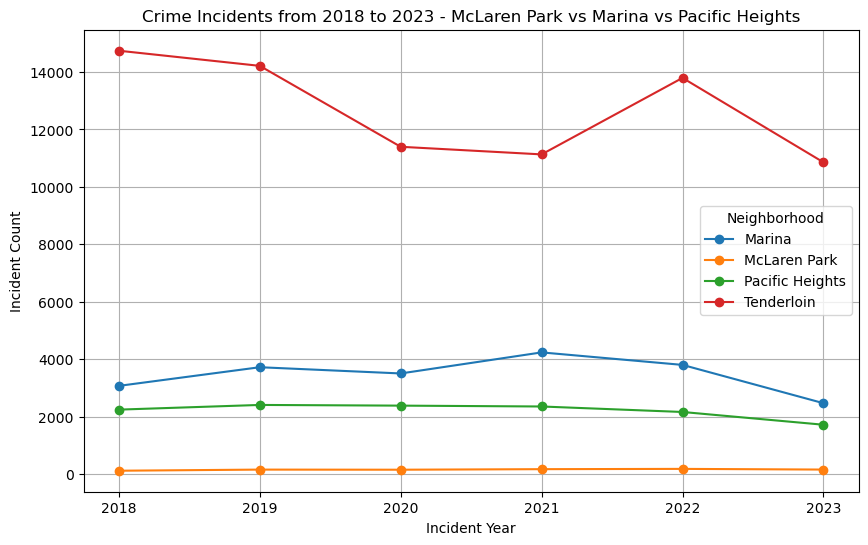

In [16]:
# Group data by "Incident Year" and "Analysis Neighborhood"
grouped_data = sf_orig_df.groupby(['Incident Year', 'Analysis Neighborhood']).size().reset_index(name='Incident Count')

# Filter data for selected neighborhoods
selected_neighborhoods = ['McLaren Park', 'Tenderloin', 'Marina', 'Pacific Heights', ]
filtered_data = grouped_data[grouped_data['Analysis Neighborhood'].isin(selected_neighborhoods)]

# Pivot data for plotting
pivot_data = filtered_data.pivot(index='Incident Year', columns='Analysis Neighborhood', values='Incident Count')

# Plot the line graph
pivot_data.plot.line(marker='o', figsize=(10, 6))
plt.title('Crime Incidents from 2018 to 2023 - McLaren Park vs Marina vs Pacific Heights')
plt.xlabel('Incident Year')
plt.ylabel('Incident Count')
plt.legend(title='Neighborhood')
plt.grid(True)
plt.show()

### It would seem that both expensive neighborhoods in San Francisco (Marina and Pacific Heights) have experienced more crime than McLaren Park/Crocker-Amazon ###

## Roland Abellano's analysis of McLAren Park / Crocker Amazon stops here ##

In [ ]:
newcode_clean = newcode_clean.copy()
newcode_clean['Incident Datetime'] = pd.to_datetime(newcode_clean['Incident Datetime'])

# Extract the month from the 'Incident Datetime' and store it in a new column 'Month'
newcode_clean['Month'] = newcode_clean['Incident Datetime'].dt.month

# Group by 'Month' and count the occurrences
incident_counts = newcode_clean['Month'].value_counts().sort_index()

# Line graph
plt.figure(figsize=(10, 6))
plt.plot(incident_counts.index, incident_counts.values, marker='o', linestyle='-')
plt.title('Incidents Count by Month in San Francisco Between 2018-2023')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(incident_counts.index, [months[month - 1] for month in incident_counts.index])
plt.show()


In [ ]:
newcode_clean = newcode_clean.copy()
newcode_clean['Incident Datetime'] = pd.to_datetime(newcode_clean['Incident Datetime'])
newcode_clean['Month'] = newcode_clean['Incident Datetime'].dt.month

# Dictionary
crime_mapping = {
    101: 'Violent Crime',
    102: 'Property Crime',
    103: 'White Collar Crime',
    104: 'Drug & Alcohol Crime',
    105: 'Hate Crime',
    106: 'Quality-of-Life Crime'
}

# Create a separate line for each crime type
plt.figure(figsize=(10, 6))

for code, description in crime_mapping.items():
    # Filter rows for the specific crime code
    filtered_data = newcode_clean[newcode_clean['New Incident Code'] == code]
    
    # Group by 'Month' and count the occurrences
    incident_counts = filtered_data['Month'].value_counts().sort_index()
    
    # Plot the line for the crime type
    plt.plot(incident_counts.index, incident_counts.values, label=description, marker='o', linestyle='-')

plt.title('Incidents by Crime Type and Month in San Francisco Between 2018-2023')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(incident_counts.index, [months[month - 1] for month in incident_counts.index])
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Filtering the data for violent crimes (New Incident Code 101) and property crimes (New Incident Code 102)
violent_crimes = newcode_clean[newcode_clean['New Incident Code'] == 101]
property_crimes = newcode_clean[newcode_clean['New Incident Code'] == 102]

# Grouping by neighborhoods and counting the occurrences for each type of crime
violent_counts = violent_crimes['Analysis Neighborhood'].value_counts()
property_counts = property_crimes['Analysis Neighborhood'].value_counts()

# Combining the counts of both types of crime
combined_counts = violent_counts.add(property_counts, fill_value=0)

# Sorting neighborhoods by the sum of Violent Crimes and Property Crimes
sorted_neighborhoods = combined_counts.sort_values(ascending=False)

# Creating a horizontal bar chart with two bars for each neighborhood
plt.figure(figsize=(10, 8))
bar_width = 0.35
index = range(len(sorted_neighborhoods))

plt.barh(index, violent_counts[sorted_neighborhoods.index], bar_width, label='Violent Crimes', color='teal')
plt.barh([i + bar_width for i in index], property_counts[sorted_neighborhoods.index], bar_width, label='Property Crimes', color='salmon')

plt.yticks([i + bar_width / 2 for i in index], sorted_neighborhoods.index)
plt.xlabel('Number of Incidents')
plt.title('Violent and Property Crimes by Neighborhood in SF Between 2018-2023')
plt.legend()
plt.margins(y=0.01)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary
crime_mapping = {
    101: 'Violent Crime',
    102: 'Property Crime',
    103: 'White Collar Crime',
    104: 'Drug & Alcohol Crime',
    105: 'Hate Crime',
    106: 'Quality-of-Life Crime'
}

# Create a new column 'Crime Type' by mapping the code numbers to descriptions
newcode_clean['Crime Type'] = newcode_clean['New Incident Code'].map(crime_mapping)

# Group by neighborhoods and count the occurrences for each crime type
neighborhood_counts = newcode_clean.groupby(['Analysis Neighborhood', 'Crime Type']).size().unstack(fill_value=0)

# Calculate the total count of incidents (sum of codes 101-106) for each neighborhood
neighborhood_counts['Total'] = neighborhood_counts.sum(axis=1)

# Sort neighborhoods by the total count of incidents
sorted_neighborhoods = neighborhood_counts['Total'].sort_values(ascending=False)

# Create a horizontal stacked bar chart for each neighborhood
plt.figure(figsize=(10, 18))
index = range(len(sorted_neighborhoods))
colors = ['teal', 'hotpink', 'darkgreen', 'darkred', 'skyblue', 'purple']
bottom = [0] * len(sorted_neighborhoods)

for i, crime_type in enumerate(['Violent Crime', 'Property Crime', 'White Collar Crime', 'Drug & Alcohol Crime', 'Hate Crime', 'Quality-of-Life Crime']):
    counts = neighborhood_counts[crime_type][sorted_neighborhoods.index]
    plt.barh(index, counts, label=crime_type, left=bottom, color=colors[i])
    bottom = [x + y for x, y in zip(bottom, counts)]

plt.yticks(index, sorted_neighborhoods.index)
plt.xlabel('Number of Incidents')
plt.title('Incidents by Crime Type and Neighborhood')
plt.legend()
plt.margins(y=0.01)
plt.show()


In [ ]:
# Filter for the top 10 safest neighborhoods
top_10_safest_neighborhoods = sorted_neighborhoods.tail(10)

# Define crime types and colors
crime_types = ['Violent Crime', 'Property Crime', 'White Collar Crime', 'Drug & Alcohol Crime', 'Hate Crime', 'Quality-of-Life Crime']
colors = ['teal', 'hotpink', 'darkgreen', 'darkred', 'skyblue', 'purple']

# Creating a horizontal stacked bar chart for the top 10 safest neighborhoods
plt.figure(figsize=(10, 10))
index = range(len(top_10_safest_neighborhoods))
bottom = [0] * len(top_10_safest_neighborhoods)

# Iterate through each crime type and add bars to the chart
for i in range(len(crime_types)):
    crime_type = crime_types[i]
    counts = neighborhood_counts[crime_type][top_10_safest_neighborhoods.index]
    plt.barh(index, counts, label=crime_type, left=bottom, color=colors[i])
    bottom = [x + y for x, y in zip(bottom, counts)]

plt.yticks(index, top_10_safest_neighborhoods.index)
plt.xlabel('Number of Incidents')
plt.title('Top 10 Safest Neighborhoods by Crime Type in SF Between 2018-2023')
plt.legend()
plt.margins(y=0.01)
plt.show()


In [ ]:
# Filter for the top 10 dangerous neighborhoods
top_10_dangerous_neighborhoods = sorted_neighborhoods.head(10)

# Define crime types and colors
crime_types = ['Violent Crime', 'Property Crime', 'White Collar Crime', 'Drug & Alcohol Crime', 'Hate Crime', 'Quality-of-Life Crime']
colors = ['teal', 'hotpink', 'darkgreen', 'darkred', 'skyblue', 'purple']

# Creating a horizontal stacked bar chart for the top 10 dangerous neighborhoods
plt.figure(figsize=(10, 10))
index = range(len(top_10_dangerous_neighborhoods))
bottom = [0] * len(top_10_dangerous_neighborhoods)

# Iterate through each crime type and add bars to the chart
for i in range(len(crime_types)):
    crime_type = crime_types[i]
    counts = neighborhood_counts[crime_type][top_10_dangerous_neighborhoods.index]
    plt.barh(index, counts, label=crime_type, left=bottom, color=colors[i])
    bottom = [x + y for x, y in zip(bottom, counts)]

plt.yticks(index, top_10_dangerous_neighborhoods.index)
plt.xlabel('Number of Incidents')
plt.title('Top 10 Dangerous Neighborhoods by Crime Type in SF Between 2018-2023')
plt.legend()
plt.margins(y=0.01)
plt.show()
